## Analyze A/B Test Results

This project will assure I have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

For this particular project, I will be working along side quizzes to check the answers to statistical calculations and tests. Certain parts of the project will ask that I answer the quiz questions. Thus, all answers in this project are correct.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Using the dataframe, I will answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("C:/Users/khana/Downloads/submit-1a514a71-6f20-4500-9382-dbc9090bbd18/home/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
line_up = len(df.query('group == "treatment" and landing_page != "new_page"')) + len(df.query('group != "treatment" and landing_page == "new_page"'))
line_up

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  I will use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now we will answer the quiz and create a new dataset that meets the specifications from the quiz.  I will store my new dataframe in **df2**.

In [8]:
df_01 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_02 = df[(df.group == 'control') & (df.landing_page == 'old_page')]
frames = [df_01, df_02]
df2 = pd.concat(frames)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` I will use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
## The timestamp variable is different for the duplicated user so we 
## need to change this to the same time and then drop a duplicate row.
## By using this stack overflow forum post, we can accomplish this:
## https://stackoverflow.com/questions/26882499/reset-time-part-of-a-pandas-timestamp

In [13]:
df2['timestamp'].replace('2017-01-14 02:55:59.590927', '2017-01-09 05:37:58.781806', inplace = True)

In [14]:
# check to see if the timestamps are the same
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep the dataframe as **df2**.

In [15]:
# drop the duplicate row
df2 = df2.drop_duplicates(keep = 'first')

In [16]:
# optional check for dropped duplicate row
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` I will use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# divide the number of converted by the total number of users in df2
df2.converted.value_counts()[1] / len(df2.index)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# divide the number of converted in control group by total number
# of users in control group
df2.groupby(["group", "converted"]).size()[1] / df2.group.value_counts()[1]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# divide the number of converted in treatment group by total number
# of users in treatment group
df2.groupby(["group", "converted"]).size()[3] / df2.group.value_counts()[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# divide total users in new_page by the total users in df2
df2.landing_page.value_counts()[0] / len(df2.index)

0.5000619442226688

e. Based on the results in the previous two portions of this question, is there evidence that one page leads to more conversions? 

**Answer:** Based on the total users that converted, there is a slightly higher number of people that converted in the control group as opposed to the treatment group. The percentage of converted in the control group is 12.04% and converted in the treatment group is 11.88%. The difference is very subtle so I do not believe there is a signifcant enough difference for a certain page that will convert more users.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, I will consider the need to make the decision just based on all the data provided.  If I want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be?

**Answer:** 
Null hypothesis- if the p-value is less than 5%, the old page has a higher chance of converting users. 
Alternative hypothesis- if the p-value is equal to or greater than 5%, then the new page has a higher chance of converting users.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We will use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

I will perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# find the mean of the converted in new page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# find the mean of the converted in old page
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
# count the total number of new page lands
n_new = df2.landing_page.value_counts()[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
# count the total number of old page lands
n_old = df2.landing_page.value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  We will store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# randomly simulate new page landings using random.choice and p_new
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.8811712889684123

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# randomly simulate old page landings using random.choice and p_old
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.8810661233255779

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
 new_page_converted.mean() - old_page_converted.mean()

0.0001051656428344705

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
# create empty lists for the bs values
p_diffs, bs_new_means, bs_old_means = [], [], []

# use a loop function to loop through the same process stated above and 
# then add to the empty lists above
for _ in range (10000):
    bs_new = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
    bs_old = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
    bs_new_means.append(bs_new.mean())
    bs_old_means.append(bs_old.mean())
    p_diffs.append(bs_new.mean() - bs_old.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what I expected?

**Answer:** The plotted histogram below is what we expect. The bell-shaped curve resembles a normal distribution. This embodies the Central Limit Theorm, which states that when there is a population with a large enough size, the mean of all samples from the same population will be approximately equal to the mean of the population. 

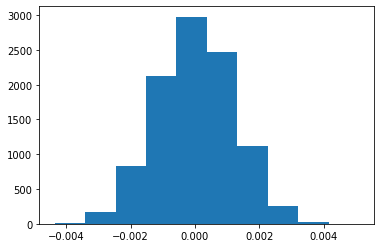

In [29]:
# oonvert p_diffs to an array and then plot a histogram
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# find the actual_diff by subtracting average old_page converts from
# new_page converts
actual_diff = df2.query('landing_page == "new_page"').converted.mean() - df2.query('landing_page == "old_page"').converted.mean()

In [31]:
# find p-value
(p_diffs > actual_diff).mean()

0.9063

k. In my own words, I will explain what I just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** What we computed is the actual versus observed difference in means of converted old page and converted new page. This means that we had random choices of these mean converted values for the observed difference, which is stored in p_diffs. The actual difference was calculated from the dataset ab_data.csv. This value that we calculated, difference in means, is the p-value. Our p-value is exceeds the critical value of 0.05 in this case and so we fail to reject the null hypothesis; we cannot assume the new page converts more users than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
#import necessary packages
import statsmodels.api as sm

# find the number of converted in old page and new page
convert_old = df2.query('landing_page == "old_page" & converted == "1"').count()[0]
convert_new = df2.query('landing_page == "new_page" & converted == "1"').count()[0]
# find the total number of users using the old page and new page
n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]

# show the variables we figured out above
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute the test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
# use the built in function provided to find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [34]:
# import necessary packages
from scipy.stats import norm
# this tells us how significant our z-score is
norm.cdf(z_score)

0.9050583127590245

In [35]:
# this tells us our critical value at 95% confidence interval
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The z-score of 1.311 is less than critical value at 95% confidence interval, 1.960, so it falls within the confidence interval range of 95%. We fail to reject the null hypothesis; the old page converted more users than the new page. Also, our p-value(0.189) is different than what we computed in parts j and k(0.898) which is expected because the null and alternative hypothesis assumed that the p_new and p_old are the same and that there is no difference in converting users from the old page and new page. However, that is not the case since the old page does convert more users than the old page based on the lower p-value(0.189).

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, it is demonstrated that the result I acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression is appropriate for this case?

**Answer:** In this case, we will use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, I will first need to create a column for the intercept, and create a dummy variable column for which page each user received.  I will add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# check the df2 head to compare the before and after of creating dummies
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [37]:
# create dummy variables from the group column
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])
# drop the treatment column since this is not necessary
df2 = df2.drop('treatment', 1)
# create intercept column
df2['intercept'] = 1
# check to make sure the columns are added and to compare with old df2
# dataframe above
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1


c. I will use **statsmodels** to import my regression model - instantiate the model, and fit the model using the two columns I created in part **b.** to predict whether or not an individual converts.

In [38]:
# initiate logistic regression model, fit it, and show the results
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:01:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

In [39]:
# find the odds of converted
print(np.exp(0.0150))

1.015113064615719


d. Provided below is a summary of my model and I will use my results to answer the following questions.

**Summary:** Holding all other variables constant, the number of converted is 1.015 times more likely to be converted than those that are not converted. This means that the old page and new page are both equal in chance of converting users. We should not assume that the new page is better than the old page.

e. What is the p-value associated with **ab_page**? Why does it differ from the value found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with the regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** The p-value found in the logistic regression model(0.19) is different than what we found in parts j and k because our null and alternative hypthesis model assumed that there is an equal probability of the old and new page converting users. In the logistic regression model, this is not the case. Also, the Logistic Regression performed is a two-tailed test, whereas the computation done in Part II is a one-tailed test. 

f. Now, consider other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into the regression model.  Are there any disadvantages to adding additional terms into the regression model?

**Answer:** Other factors that influence whether an individual converts could be age. Older users may prefer more information on the pages as opposed to a kid, where they may prefer more pictures and a more casual theme. Adding more factors into the regression model will increase or decrease confidence intervals. A disadvantage of multiple factors in a logistic regression model is that it reduces the power of analysis.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. I will need to read in the **countries.csv** dataset and merge together the datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  I will need to create dummy variables for these country columns - **Hint: We will need two columns for the three dummy varaibles.**

**Answer:** The country that a user is in does not affect the conversion rate. We can determine this by figuring out the conversion rate of each of the countries.
US: 0.1195
UK: 0.1206
CA: 0.1153
These are approximately all the same. We fail to reject the null hypothesis.

In [40]:
# read in the countries csv
df3 = pd.read_csv('C:/Users/khana/Downloads/submit-1a514a71-6f20-4500-9382-dbc9090bbd18/home/countries.csv')
# show the head of countries dataframe
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# create dummy variables for country column
df3[['CA','UK', 'US']] = pd.get_dummies(df3['country'])
# drop the country column since this is not necessary
df3 = df3.drop('country', 1)
# show the head of the newly created dataframe
df3.head()

,user_id,CA,UK,US
0,834778,0,1,0
1,928468,0,0,1
2,822059,0,1,0
3,711597,0,1,0
4,710616,0,1,0


In [42]:
# join the two dataframes
new_df = df2.join(df3.set_index('user_id'), on='user_id')
# show the head of the new_df to make sure it is joined
new_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,0,0


In [43]:
# find the conversion rates of each of the countries to answer the
# question.
new_df.query('US == "1"').converted.mean(),new_df.query('UK == "1"').converted.mean(),new_df.query('CA == "1"').converted.mean()

(0.1195468006423762, 0.12059448568984076, 0.11531829781364232)

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.

A summary of results, and my conclusions based on the result will be provided below.

In [44]:
# multiply the country by ab_page to ensure that we are looking at the
# interatction between these two variables
new_df['US_ab_page'] = new_df['US'] * new_df['ab_page']
new_df['UK_ab_page'] = new_df['UK'] * new_df['ab_page']
new_df['CA_ab_page'] = new_df['CA'] * new_df['ab_page']

In [45]:
# initiate model, fit it, then show results
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'US_ab_page', 'UK_ab_page', 'CA_ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 May 2020   Pseudo R-squ.:               9.383e-06
Time:                        22:01:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.5731
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
US_ab_page     0.0173      0.013      1.374      0.170      -0.007       0.042
UK_ab_page     0.0115      0.018      0.639      0.523      -0.024       0.047
CA_ab_page    -0.0002      0.037     -0.006      0.995      -0.073       0.073
==============================================================================
"""

In [46]:
# by using this stackflow page, we can figure out the odds ratio:
# https://stackoverflow.com/questions/16705598/python-2-7-statsmodels-formatting-and-writing-summary-output
np.exp(results.params)

intercept     0.134827
US_ab_page    1.017439
UK_ab_page    1.011611
CA_ab_page    0.999761
dtype: float64

**Summary:** By looking at the odds ratio of the interaction between country and ab_page, we have an equal chance of the ab_page converting users in each country(1.017, 1.012, 1.00). We thus fail to reject the null hypothesis; the new page does not convert more than the old page. 

<a id='conclusions'></a>
## Conclusions

Based on the statistical tests we used, the Z-test, logistic regression model, and actual difference observed, the results have shown that the new and old page have an approximately equal chance of converting users. We fail to reject the null hypothesis. I recommend to the e-commerce company to keep the old page. This will save time and money on creating a new page. 